<a href="https://colab.research.google.com/github/Prawin2005/CODSOFT-internship/blob/main/TASK_1_(Titanic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using Google Colab file path.
First few rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123      

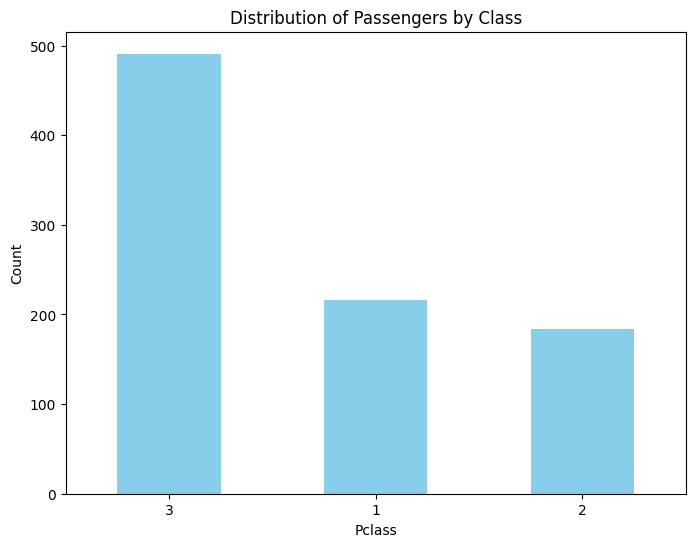

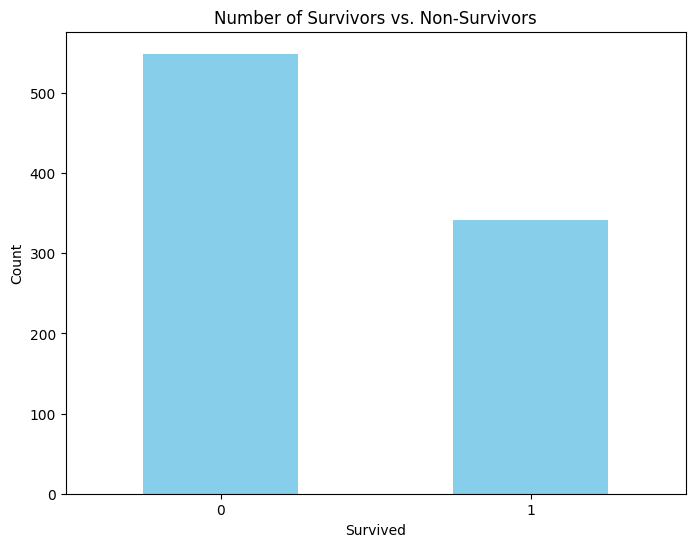


Model Performance:
Accuracy: 0.8268156424581006
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86       110
           1       0.82      0.71      0.76        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.82       179



In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Function to plot bar charts
def plot_bar_chart(data, column, title):
    plt.figure(figsize=(8, 6))
    data[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

# Main function
def main():
    # File paths for both Google Colab and local environment
    colab_path = '/content/Titanic-Dataset.csv'
    local_path = 'Titanic-Dataset.csv'  # Replace this with your local path if needed

    # Check if running on Google Colab or local environment
    if os.path.exists(colab_path):
        file_path = colab_path
        print("Using Google Colab file path.")
    elif os.path.exists(local_path):
        file_path = local_path
        print("Using local file path.")
    else:
        print("File not found. Please upload the dataset or set the correct file path.")
        return

    # Load the dataset
    data = pd.read_csv(file_path)

    print("First few rows of the dataset:")
    print(data.head())

    # Handling missing values
    data['Age'].fillna(data['Age'].median(), inplace=True)
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

    # Plot bar charts for visualizing data
    plot_bar_chart(data, 'Pclass', 'Distribution of Passengers by Class')
    plot_bar_chart(data, 'Survived', 'Number of Survivors vs. Non-Survivors')

    # Features and target variable
    features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
    target = 'Survived'

    X = data[features]
    y = data[target]

    # Preprocessing pipeline for numerical and categorical data
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', SimpleImputer(strategy='median'), ['Age', 'Fare', 'SibSp', 'Parch']),
            ('cat', Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))
            ]), ['Sex', 'Embarked'])
        ]
    )

    # Define model pipeline
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(n_estimators=100, random_state=0))
    ])

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Display model performance metrics
    print("\nModel Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

# Entry point of the program
if __name__ == "__main__":
    main()
